Future sales prediction based on advestisement

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.isna().sum()
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
# Outlier removal using IQR
q1_tv = df['TV'].quantile(0.25)
q3_tv = df['TV'].quantile(0.75)
iqr_tv = q3_tv - q1_tv

# Compute bounds
lower_bound = q1_tv - 1.5 * iqr_tv
upper_bound = q3_tv + 1.5 * iqr_tv

# Filter the DataFrame
df_cl = df[(df['TV'] >= lower_bound) & (df['TV'] <= upper_bound)]

q1_nw = df['Newspaper'].quantile(0.25)
q3_nw = df['Newspaper'].quantile(0.75)
iqr_nw = q3_nw - q1_nw

# Compute bounds
lower_bound = q1_nw - 1.5 * iqr_nw
upper_bound = q3_nw + 1.5 * iqr_nw

df_cl = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]


In [18]:


q1_rd = df['Radio'].quantile(0.25)
q3_rd = df['Radio'].quantile(0.75)
iqr_rd = q3_rd - q1_rd

# Compute bounds
lower_bound = q1_rd - 1.5 * iqr_rd
upper_bound = q3_rd + 1.5 * iqr_rd

df_cl = df[(df['Radio'] >= lower_bound) & (df['Radio'] <= upper_bound)]

df_cl.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


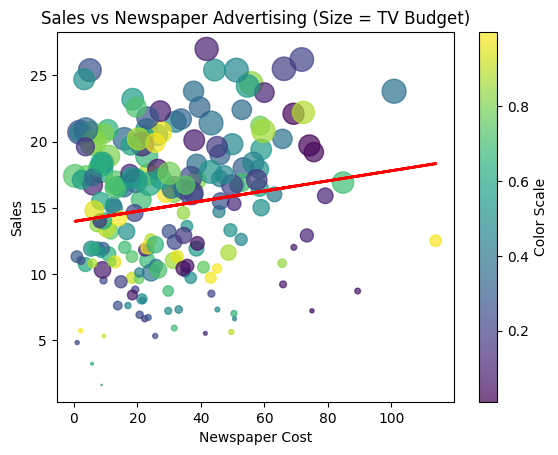

In [20]:

x = df_cl['Newspaper']
y = df_cl['Sales']


colors = np.random.rand(len(df))  # match number of rows in df
plt.scatter(x, y, c=colors, s=df['TV'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Color Scale')
plt.xlabel("Newspaper Cost")
m, b = np.polyfit(x, y, 1)  # Linear regression: y = mx + b
plt.plot(x, m*x + b, color='red', linewidth=2, label='Best Fit Line')

plt.ylabel("Sales")
plt.title("Sales vs Newspaper Advertising (Size = TV Budget)")
plt.show()

In [19]:
correlation=df.corr()
print(correlation['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [21]:
x=df_cl.drop(['Sales'],axis=1)
y=df_cl['Sales']
y


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)




In [23]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred=clf.predict(x_test)
y_pred


array([12.43619554, 13.77551181, 18.19960754,  6.36527582, 16.01380432,
       13.09745831,  8.866726  , 10.65075172, 19.32196508, 13.79890656,
       11.6606946 , 17.20917321, 20.10640391, 12.20086376, 10.72651851,
       15.30699558, 17.86225461, 17.22652141,  6.00410818,  9.34806341])

In [25]:
print(clf.score(x_test,y_test))
print(clf.coef_)

0.8892997602995535
[0.05511641 0.1036919  0.00174254]
